# Import

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import ttest_ind

In [2]:
# Specify the path to your Excel file
file_path = "C:/Users/asifa/OneDrive/Desktop/sas project/archive (1)/diabetes_prediction_dataset.csv"

In [3]:
# Load the Excel file into a pandas DataFrame
df = pd.read_csv(file_path)

In [4]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Exploratory Data Analysis (EDA)

In [5]:
# View the first few rows of the dataset
print(df.head())


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [6]:
# Display information about the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [7]:
# Check the summary statistics of numerical columns
print(df.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [8]:
# Check for missing values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [9]:
# Check for duplicates
print(df.duplicated().sum())

3854


In [10]:
# Handle duplicates
df.drop_duplicates(inplace=True)

In [11]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


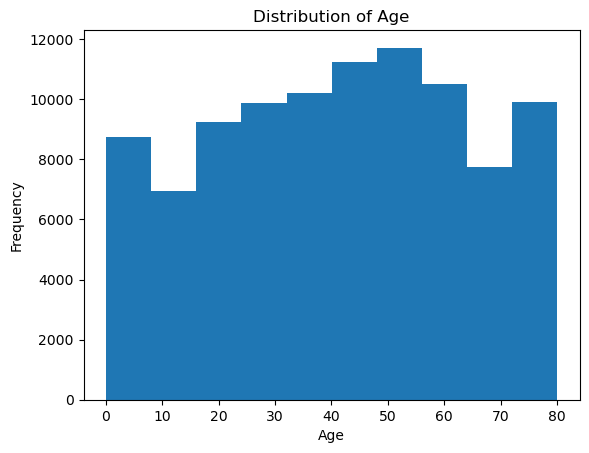

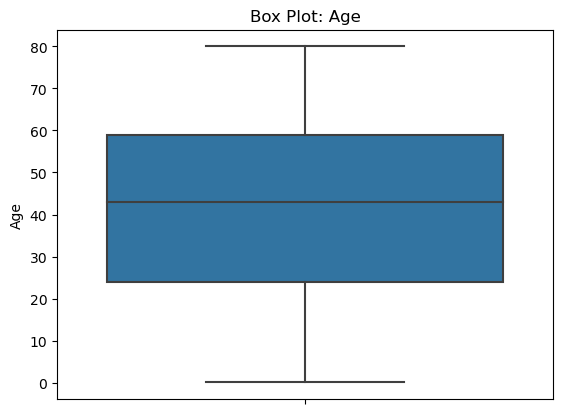

In [13]:
# Visualize the distributions of variables using histograms
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


sns.boxplot(data=df, y='age')
plt.ylabel('Age')
plt.title('Box Plot: Age')
plt.show()

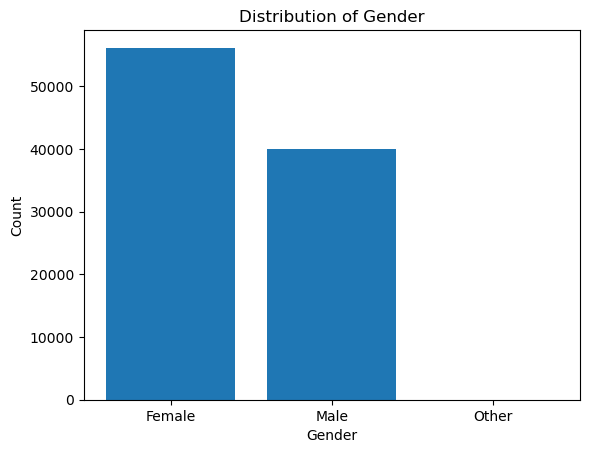

In [14]:
gender_counts = df['gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

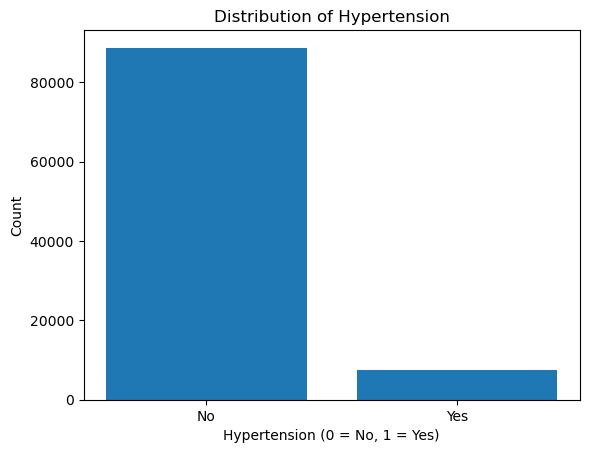

In [15]:
hypertension_counts = df['hypertension'].value_counts()

plt.bar(hypertension_counts.index, hypertension_counts.values)
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Hypertension')
plt.xticks([0, 1], ['No', 'Yes'])  # Modify the x-ticks and x-labels
plt.show()

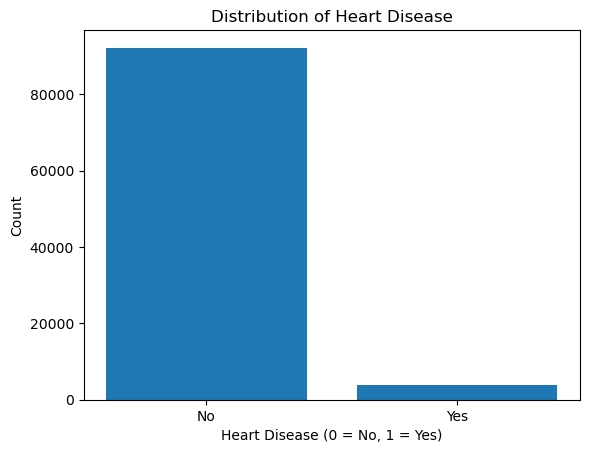

In [16]:
heart_disease_counts = df['heart_disease'].value_counts()

plt.bar(heart_disease_counts.index, heart_disease_counts.values)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease')
plt.xticks([0, 1], ['No', 'Yes'])  # Modify the x-ticks and x-labels
plt.show()

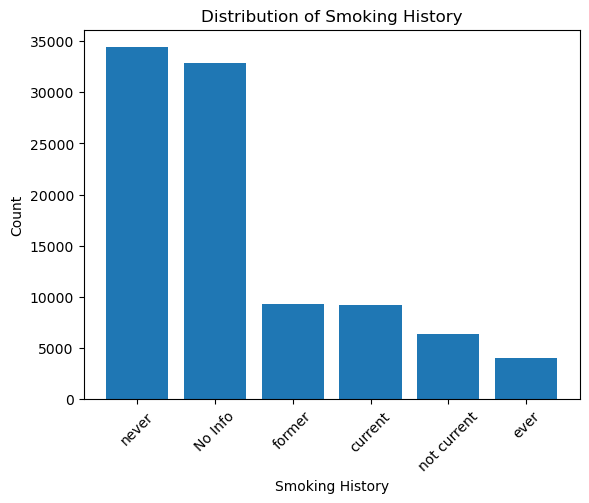

In [17]:
smoking_history_counts = df['smoking_history'].value_counts()

plt.bar(smoking_history_counts.index, smoking_history_counts.values)
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.title('Distribution of Smoking History')
plt.xticks(rotation=45)
plt.show()

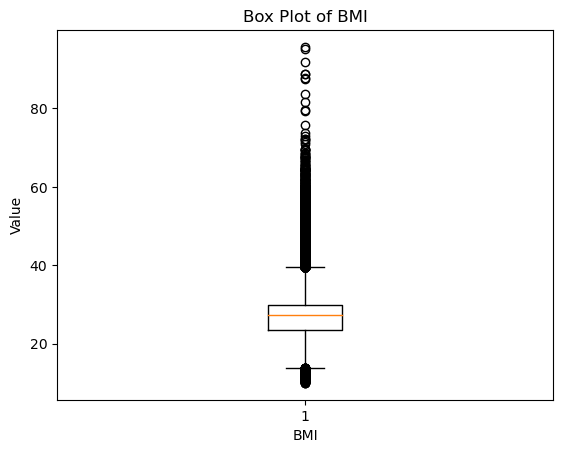

In [18]:
plt.boxplot(df['bmi'])
plt.xlabel('BMI')
plt.ylabel('Value')
plt.title('Box Plot of BMI')
plt.show()

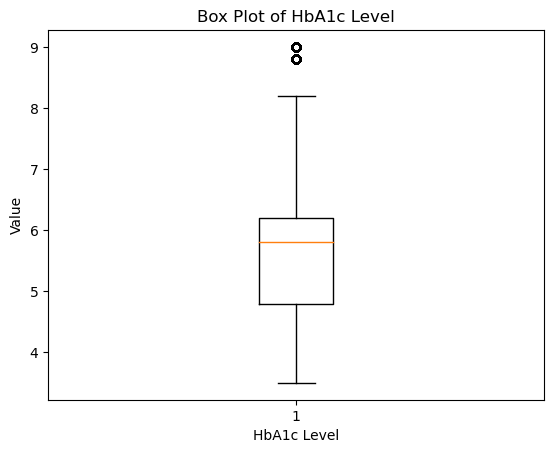

In [19]:
plt.boxplot(df['HbA1c_level'])
plt.xlabel('HbA1c Level')
plt.ylabel('Value')
plt.title('Box Plot of HbA1c Level')
plt.show()

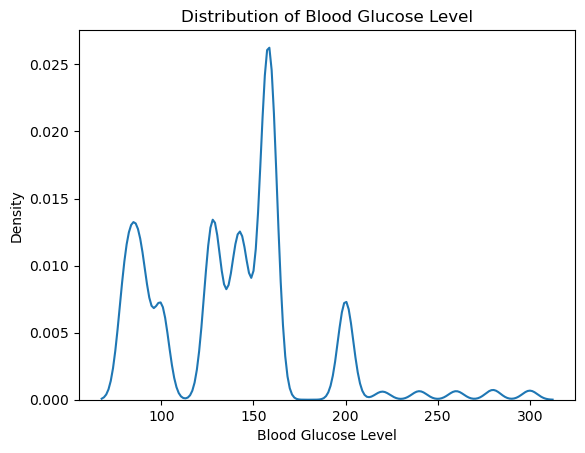

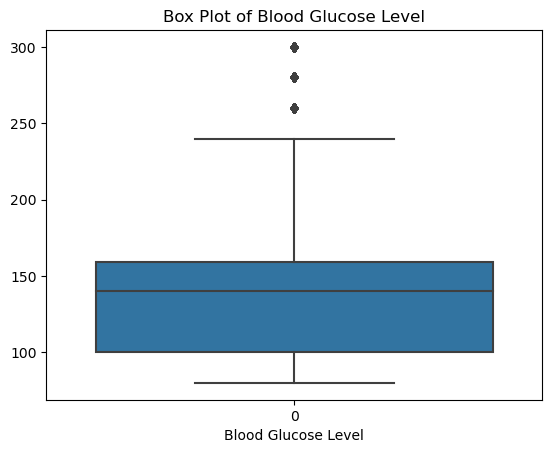

In [20]:
sns.kdeplot(df['blood_glucose_level'])
plt.xlabel('Blood Glucose Level')
plt.ylabel('Density')
plt.title('Distribution of Blood Glucose Level')
plt.show()

sns.boxplot(df['blood_glucose_level'])
plt.xlabel('Blood Glucose Level')
plt.title('Box Plot of Blood Glucose Level')
plt.show()

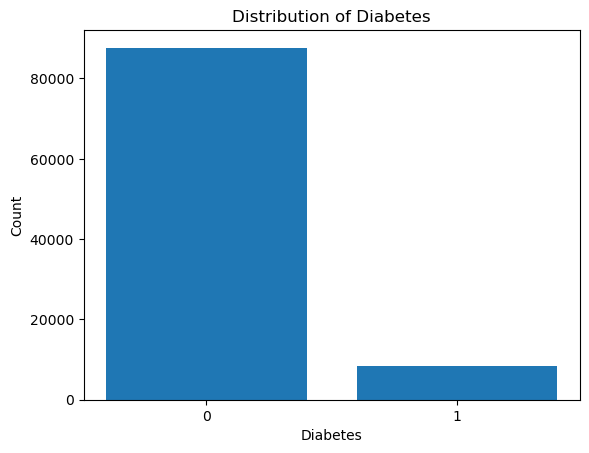

In [21]:
diabetes_counts = df['diabetes'].value_counts()

plt.bar(['0', '1'], diabetes_counts.values)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Distribution of Diabetes')
plt.show()

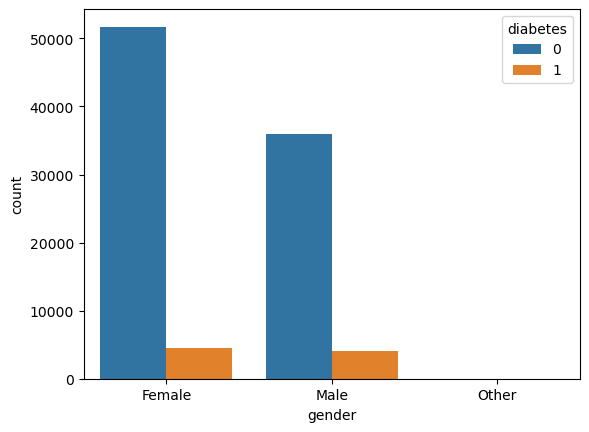

In [22]:
# Examine the frequencies or proportions of categorical variables
sns.countplot(x='gender', hue='diabetes', data=df)
plt.show()

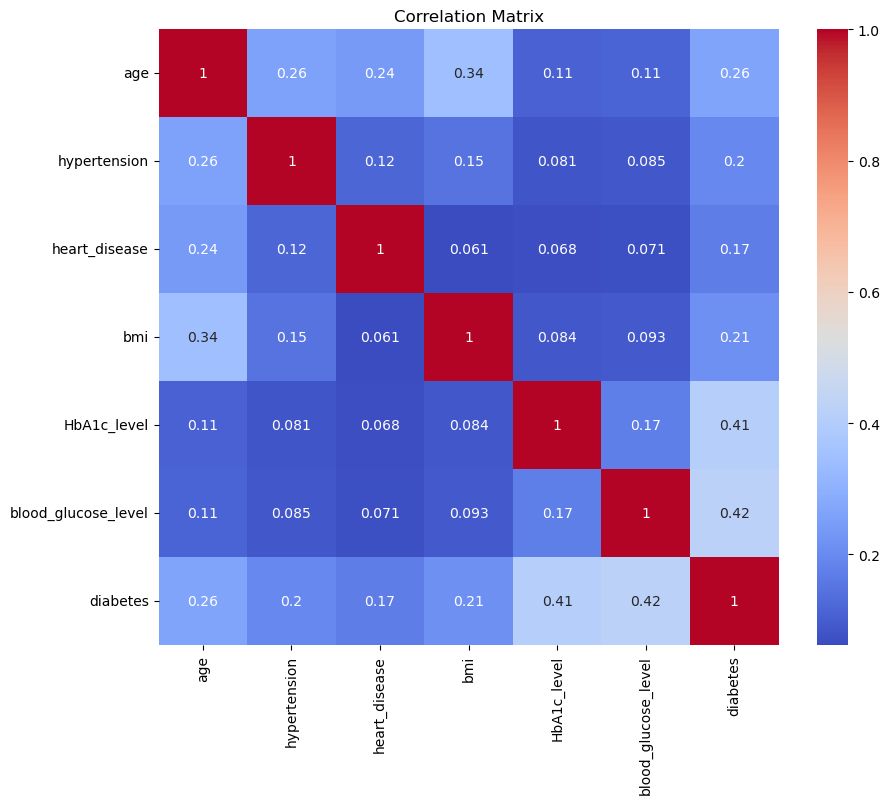

In [23]:
# Visualize the correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing for modelling

In [24]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

In [25]:
# Calculate the correlation coefficient between HbA1c levels and diabetes
correlation = df[["HbA1c_level", "diabetes"]].corr().iloc[0, 1]
correlation

0.40640837582949013

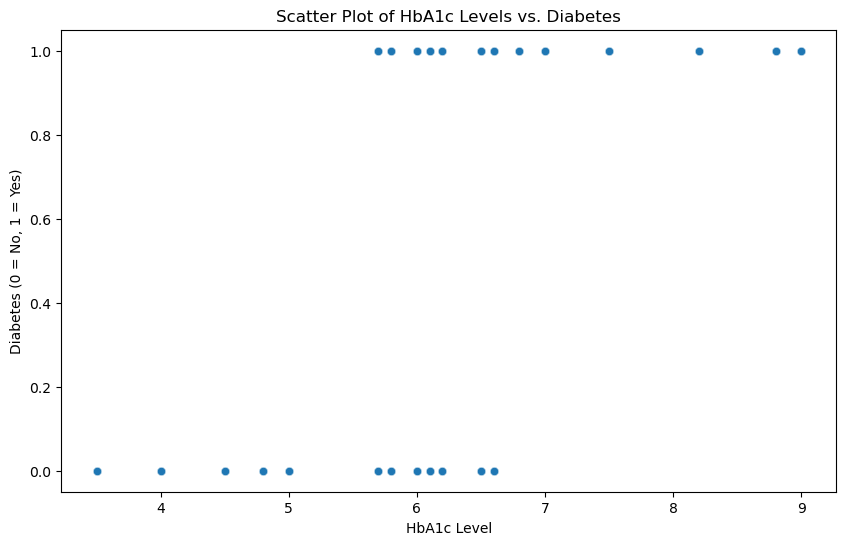

In [29]:
# Create a scatter plot of HbA1c levels vs. diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="HbA1c_level", y="diabetes", alpha=0.5)
plt.xlabel("HbA1c Level")
plt.ylabel("Diabetes (0 = No, 1 = Yes)")
plt.title("Scatter Plot of HbA1c Levels vs. Diabetes")
plt.savefig("scatter_plot_HbA1c_vs_diabetes.png")

In [26]:
# Split the dataset into two groups based on diabetes status
diabetes_group = df[df['diabetes'] == 1]
no_diabetes_group = df[df['diabetes'] == 0]

# Perform a statistical test, such as t-test, to compare the mean HbA1c levels between the two groups
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(diabetes_group['HbA1c_level'], no_diabetes_group['HbA1c_level'])
print("T-statistic:", t_stat)
print("p-value:", p_value)
# Interpret the results
if p_value < 0.05:
    print("HbA1c level is significantly different between patients with and without diabetes.")
else:
    print("HbA1c level is not significantly different between patients with and without diabetes.")

T-statistic: 137.91901253274253
p-value: 0.0
HbA1c level is significantly different between patients with and without diabetes.


In [31]:
# Split the data into predictors (X) and the target variable (y)
X = df[['HbA1c_level']]
y = df['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

logistic_values = logreg.coef_
print("Logistic Regression Coefficients:")
print(logistic_values)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Logistic Regression Coefficients:
[[2.40022186]]
Accuracy: 0.9377535101404056
Confusion Matrix:
 [[17509     0]
 [ 1197   524]]


In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_random_forest = model.predict(X_test)

# Evaluate the model's performance
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
confusion_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
classification_report_random_forest = classification_report(y_test, y_pred_random_forest)

print("Accuracy:", accuracy_random_forest)
print("Confusion Matrix:\n", confusion_matrix_random_forest)


Accuracy: 0.9516900676027041
Confusion Matrix:
 [[17509     0]
 [  929   792]]


## Result

 Logistic Regression and Random Forest models were trained on the dataset using only HbA1c_level as a predictor variable for diabetes.

Model performance:
- Logistic Regression: Accuracy = 0.9378; Confusion Matrix = [[17509, 0], [1197, 524]]
- Random Forest: Accuracy = 0.9517; Confusion Matrix = [[17509, 0], [929, 792]]

From these findings, we can conclude that there is a significant difference in HbA1c levels between patients with and without diabetes and that using HbA1c level as a predictor variable can help predict diabetes with reasonable accuracy. 